# Grafo causal original

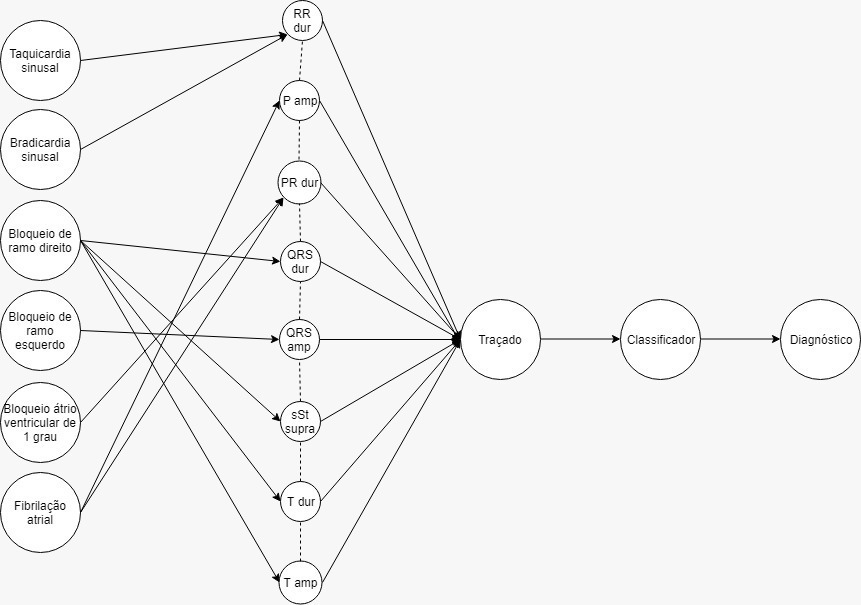

# Grafo causal adaptado às variáveis da base

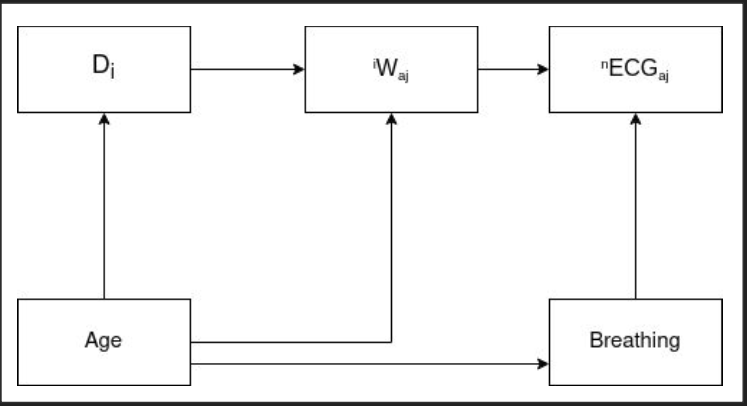

# Inicialização

In [4]:
# Importação de bibliotecas
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

In [5]:
# Leitura da base
base = np.load('../data/training/db.npy')

In [6]:
data = pd.DataFrame(data=base)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,265,266,267,268,269,270,271,272,273,274
0,1.042445,0.0,1.0,0.0,0.0,0.0,0.0,-1.605146,-0.035974,0.0,...,-0.264383,0.857133,-0.193820,-0.047441,-0.384810,-0.386101,-0.473993,-0.000948,-0.391405,0.125174
1,1.042445,0.0,1.0,0.0,0.0,0.0,0.0,-0.823590,-0.006823,0.0,...,-0.324854,0.455995,-0.121722,0.178273,-0.214656,-0.023737,-0.199015,0.099980,-0.236866,-0.172228
2,1.042445,0.0,1.0,0.0,0.0,0.0,0.0,-0.432813,-0.010183,0.0,...,-0.012303,-0.395951,0.102260,-0.089119,0.166607,0.049959,-0.024697,-0.926144,0.096810,-0.265864
3,1.042445,0.0,1.0,0.0,0.0,0.0,0.0,-0.628202,0.009088,0.0,...,0.007211,-0.042579,-0.061720,0.448912,0.170832,-0.307705,-0.021263,0.036372,0.146182,-0.184333
4,1.042445,0.0,1.0,0.0,0.0,0.0,0.0,-1.018979,-0.035513,0.0,...,0.048574,0.273322,-0.067199,-0.075505,-0.092627,1.250074,-0.010614,0.321794,-0.271197,0.057705


# Definição de funções auxiliares

In [4]:
def regression(X,y):
    logistic_regression = LogisticRegression(random_state=0)
    cv_results = cross_validate(logistic_regression, X, y, cv=5, return_estimator=True)
    return cv_results

In [5]:
def MLP_regression(X,y):
    regression = MLPRegressor(random_state=1, max_iter=500)   
    cv_results = cross_validate(regression, X, y, cv=2, return_estimator=True)
    return cv_results

# Cálculo do efeito AGE -> D

### Backdoor-path 1: AGE -> W <- D
Bloqueado pelo collider W

### Backdoor-path 2: AGE -> Breathing -> ECG <- W <- D
Bloqueado pelo collider ECG

## Efeito causal Age -> 1dAvb

In [6]:
X = np.array(data.iloc[:,0]).reshape(-1,1) 
y = data.iloc[:,1]
results = regression(X,y)
print('Acuracy:\t' + str(np.mean(results['test_score'])))
print('Coefficient:\t' + str(np.mean(np.array([i.coef_ for i in results['estimator']]))))

Acuracy:	0.9320893665721253
Coefficient:	0.6627425935328697


## Efeito causal Age -> RBBB

In [7]:
X = np.array(data.iloc[:,0]).reshape(-1,1) 
y = data.iloc[:,2]
results = regression(X,y)
print('Acuracy:\t' + str(np.mean(results['test_score'])))
print('Coefficient:\t' + str(np.mean(np.array([i.coef_ for i in results['estimator']]))))

Acuracy:	0.8761390588976795
Coefficient:	0.6170007293468645


## Efeito causal Age -> LBBB

In [8]:
X = np.array(data.iloc[:,0]).reshape(-1,1) 
y = data.iloc[:,3]
results = regression(X,y)
print('Acuracy:\t' + str(np.mean(results['test_score'])))
print('Coefficient:\t' + str(np.mean(np.array([i.coef_ for i in results['estimator']]))))

Acuracy:	0.9376656549070341
Coefficient:	0.9739995431193466


ravel() ## Efeito causal Age -> SB

In [9]:
X = np.array(data.iloc[:,0]).reshape(-1,1) 
y = data.iloc[:,4]
results = regression(X,y)
print('Acuracy:\t' + str(np.mean(results['test_score'])))
print('Coefficient:\t' + str(np.mean(np.array([i.coef_ for i in results['estimator']]))))

Acuracy:	0.9502778192433364
Coefficient:	-0.12821434825868655


## Efeito causal Age -> ST

In [10]:
X = np.array(data.iloc[:,0]).reshape(-1,1) 
y = data.iloc[:,5]
results = regression(X,y)
print('Acuracy:\t' + str(np.mean(results['test_score'])))
print('Coefficient:\t' + str(np.mean(np.array([i.coef_ for i in results['estimator']]))))

Acuracy:	0.8575707817087126
Coefficient:	-0.32793939795786065


## Efeito causal Age -> AF

In [11]:
X = np.array(data.iloc[:,0]).reshape(-1,1) 
y = data.iloc[:,6]
results = regression(X,y)
print('Acuracy:\t' + str(np.mean(results['test_score'])))
print('Coefficient:\t' + str(np.mean(np.array([i.coef_ for i in results['estimator']]))))

Acuracy:	0.8956179197558507
Coefficient:	1.2318110481624907


 # Cálculo do efeito causal D -> W 

Seguindo as relações do grafo causal original.

### Relação entre dataset e tipos de onda

- Coluna 7: len(P)
- Colunas 8 até 39: coeficientes da série de Fourier da onda P
- Coluna 40: len(QRS)
- Colunas 41 até 80: coeficientes da série de Fourier do complexo QRS
- Coluna 81: len(T)
- Colunas 82 até 145: coeficientes da série de Fourier da onda T
- Coluna 146: len(batimento)
- Colunas 147 até 274: coeficientes da série de Fourier do batimento

### Backdoor-path 1: D <- AGE -> W

Fazer condicionamento do fork em AGE

### Backdoor-path 2: D <- AGE -> Breathing -> ECG <- W

Bloqueado pelo collider ECG

## Efeito causal D(AF) -> P

In [13]:
import causallib
from causallib.estimation import IPW

X = data[[0,6]]
y = np.ravel(data[[7]])
learner = LogisticRegression(penalty='l2', 
                             solver='lbfgs',
                             max_iter=500,
                            random_state=42,
                            n_jobs=12)    
ipw = IPW(learner)

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=42)

In [18]:
np.array(X_train)

array([-0.86880922,  0.        ])

In [19]:
ipw.fit(np.array(Y_train),np.array(X_train))

ValueError: Expected 2D array, got 1D array instead:
array=[ 0.05565912  1.42338072 -0.82359048 ... -0.62820168 -1.11667368
 -0.62820168].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [13]:
model.score(X_test,Y_test)

0.04295034538315623

In [13]:
X = data[[0,6]]
y = data[[i for i in range(8,40)]]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=1)
regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, Y_train)

In [14]:
regr.score(X_test, Y_test)

0.0004888130923177969

In [15]:
regr.predict(X_test)

array([[ 2.61588848e-02, -5.57359064e-06, -2.36858590e-02, ...,
        -1.20705599e-02,  9.41151557e-03, -4.64424412e-03],
       [ 1.00634081e-02,  2.32061989e-06, -3.14516670e-03, ...,
        -6.20828914e-03,  3.96874522e-03, -2.71555147e-03],
       [-1.71227703e-02,  1.72915646e-05,  7.29883215e-03, ...,
        -3.16482093e-02,  2.95404751e-02, -2.35371844e-02],
       ...,
       [-7.39363428e-03,  1.14915869e-05,  1.95522602e-02, ...,
         1.53959991e-04, -1.80361732e-03, -3.35794282e-04],
       [-2.48506767e-02,  2.06625539e-05,  4.22496870e-02, ...,
         6.51620913e-03, -7.57597985e-03,  2.04396291e-03],
       [-2.49314539e-02, -3.15984568e-06,  1.95087186e-01, ...,
         5.63298430e-02, -4.16962602e-02,  3.83460318e-02]])

In [16]:
data[[0,6]]

,0,6
0,1.042445,0.0
1,1.042445,0.0
2,1.042445,0.0
3,1.042445,0.0
4,1.042445,0.0
...,...,...
602905,1.394519,0.0
602906,1.394519,0.0
602907,1.394519,0.0
602908,1.394519,0.0


In [17]:
results

{'fit_time': array([ 9.54891992, 12.19615531]),
 'score_time': array([0.14929223, 0.15871501]),
 'estimator': [MLPRegressor(max_iter=500, random_state=1),
  MLPRegressor(max_iter=500, random_state=1)],
 'test_score': array([0.04301812, 0.04281792])}

In [18]:
X = data[[0,6]]
y = data[[7]]
reg = LinearRegression().fit(X, y)
print(reg.score(X,y))
print(reg.coef_)

0.041597016391568986
[[-0.0802642  -0.54864193]]


## Efeito causal D(LBBB) -> QRS

In [19]:
X = data[[0,3]]
y = data[[79]]
reg = LinearRegression().fit(X, y)
print(reg.score(X,y))
print(reg.coef_)

0.016128289260151307
[[ 0.00996588 -0.53097997]]


In [20]:
data[[i for i in range(7,40)]]

,7,8,9,10,11,12,13,14,15,16,...,30,31,32,33,34,35,36,37,38,39
0,-1.605146,-0.035974,0.0,0.499309,-0.050539,0.308561,0.011736,0.139591,0.027288,0.069764,...,-0.008536,0.035198,-0.009588,0.035571,-0.011699,0.037532,-0.011939,0.035162,-0.012047,0.031758
1,-0.823590,-0.006823,0.0,0.262567,-0.093080,0.594897,0.085645,0.116204,-0.221241,0.360392,...,0.109111,-0.054787,0.075694,-0.092315,0.127269,0.040093,0.090863,-0.221026,0.116742,0.156003
2,-0.432813,-0.010183,0.0,0.096616,-0.267440,0.293197,-0.085756,-0.038093,-0.152296,0.415891,...,0.174420,-0.101813,0.118786,-0.078771,0.114106,-0.114172,0.102783,-0.095543,0.106905,-0.042623
3,-0.628202,0.009088,0.0,0.098530,-0.287090,0.314504,0.018519,0.191475,-0.077033,0.106331,...,0.068263,-0.094957,0.040432,-0.031818,0.052284,-0.058318,0.053872,-0.104303,0.071118,0.120689
4,-1.018979,-0.035513,0.0,0.336389,0.226966,0.255655,0.255521,-0.077482,0.140835,-0.061008,...,-0.174029,0.220105,-0.193793,0.164416,-0.178875,0.199696,-0.179690,0.238516,-0.178621,0.378673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602905,-0.725896,0.123508,0.0,0.041534,-0.483689,0.236909,-0.312388,0.118989,-0.427098,0.053255,...,0.244352,-0.216011,0.296658,-0.272400,0.259195,-0.332422,0.274693,-0.303508,0.249049,-0.998241
602906,-1.018979,-0.017062,0.0,0.056203,-0.436264,0.360839,-0.352933,0.180357,-0.381982,0.348176,...,0.413831,-0.390712,0.392845,-0.402700,0.419199,-0.415573,0.394344,-0.407300,0.385909,-0.305591
602907,-0.921285,-0.047943,0.0,-0.596180,0.294281,0.056888,0.257676,-0.227787,0.296425,-0.169655,...,-0.339948,0.286373,-0.290374,0.289759,-0.279635,0.322319,-0.264570,0.298844,-0.252931,0.231401
602908,-0.921285,0.006305,0.0,-0.336640,-0.342752,0.104557,-0.567857,0.188507,-0.628199,0.341047,...,0.592213,-0.590201,0.612965,-0.606103,0.619607,-0.661766,0.611174,-0.672176,0.601422,-0.590655


In [21]:
# Cálculo do efeito D -> W
# Backdoor-path 1: D <- AGE -> W: fazer condicionamento do fork em AGE
# Backdoor-path 2: D <- AGE -> Breathing -> ECG <- W: bloqueado pelo collider ECG

In [22]:
# Cálculo do efeito AGE -> W
# Backdoor-path 1: AGE -> D -> W: fazer condicionamento da chain em D
# Backdoor-path 2: AGE -> Breathing -> ECG <- W: bloqueado pelo collider ECG

In [23]:
# Cálculo do efeito W -> ECG
# Backdoor-path 1: W <- D <- AGE -> Breathing -> ECG
# Backdoor-path 2: W <- AGE -> Breathing -> ECG
# Condicionamento do fork em AGE bloqueia ambos os caminhos

In [24]:
# Cálculo do efeito AGE -> Breathing
# Backdoor-path 1: AGE -> D -> W -> ECG <- Breathing: bloqueado pelo collider ECG
# Backdoor-path 2: AGE -> W -> ECG <- Breathing: bloqueado pelo collider ECG

In [25]:
# Cálculo do efeito Breathing -> ECG
# Backdoor-path 1: Breathing <- AGE -> W -> ECG